# Customer Churn Prediction

This notebook analyzes customer churn data and builds a logistic regression model to predict churn.

## 1. Import Libraries

Importing necessary libraries for data analysis and visualization.

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## 2. Load the Dataset

Reading the customer churn dataset.

In [138]:
df=pd.read_csv("./Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3. Data Exploration

Checking for missing values and understanding the data structure.

In [139]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [140]:
df.shape

(7043, 21)

## 4. Data Cleaning

Dropping unnecessary columns and converting data types.

In [141]:
df.drop(['customerID'], axis =1, inplace=True)

In [142]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print(df.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


## 5. Feature Engineering

Identifying categorical and numerical columns.

In [143]:
categorical_col = [col for col in df.columns if df[col].dtype == 'object']

In [144]:
numerical_cols=['SeniorCitizen','tenure','MonthlyCharges','TotalCharges'];

In [145]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

## 6. Data Visualization

Visualizing the relationship between numerical features and churn.

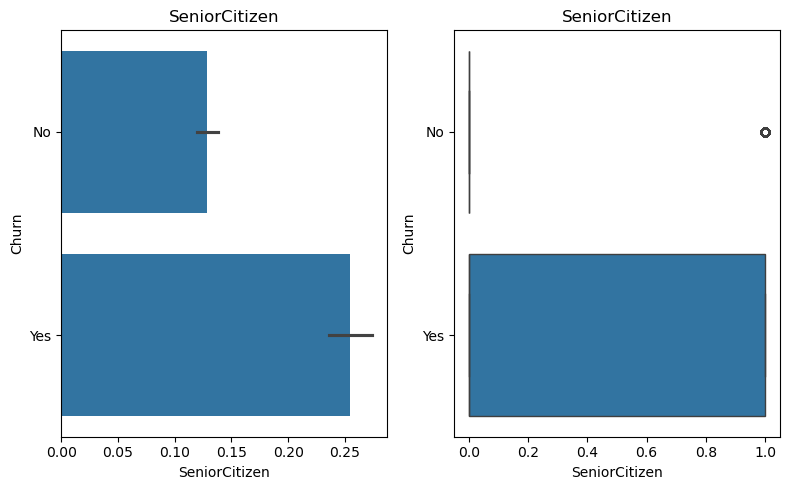

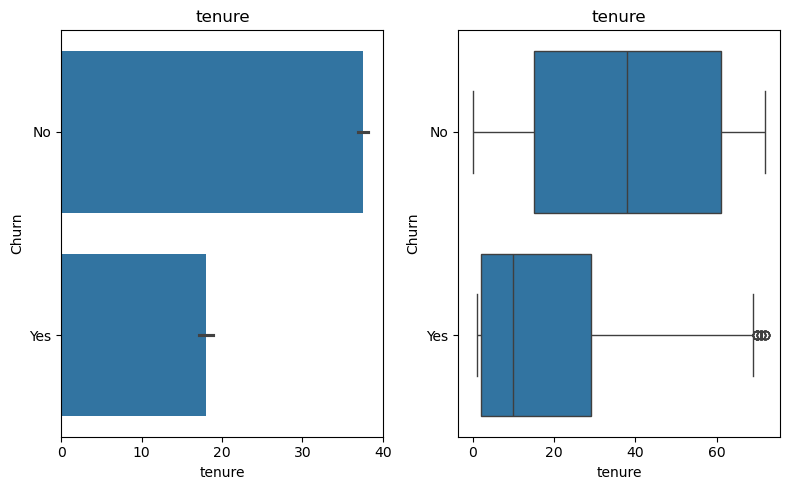

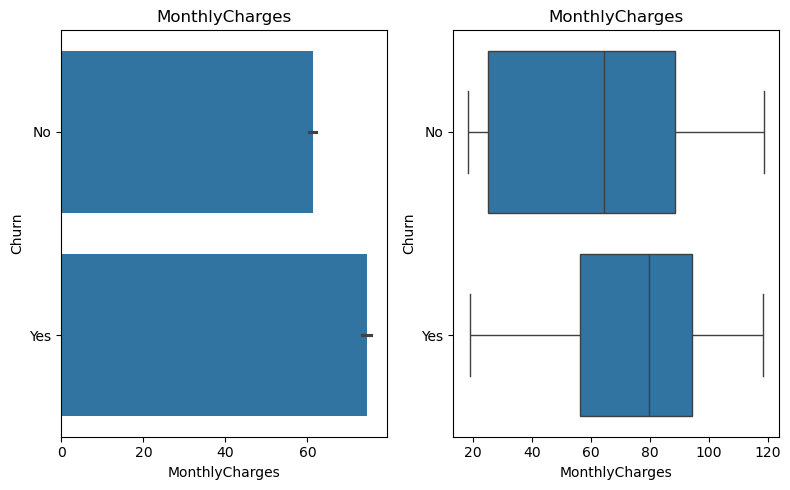

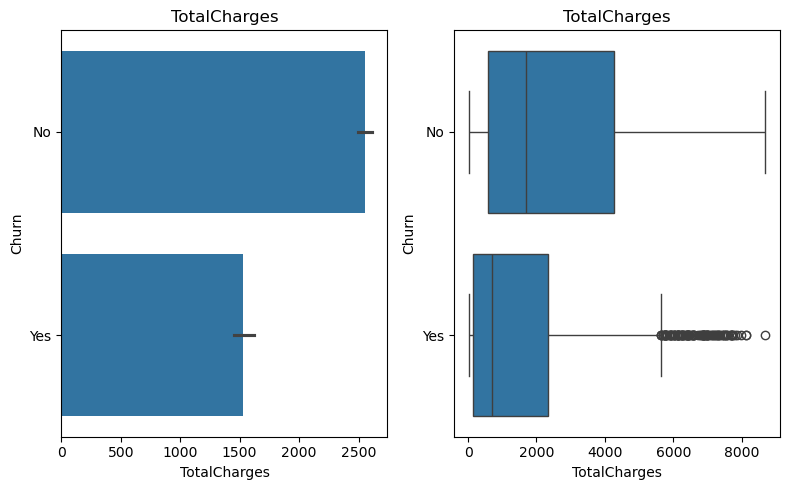

In [146]:
for i, col in enumerate(numerical_cols, 1):
    plt.figure(figsize=(8, 5))
    plt.subplot(1, 2, 1)  
    sn.barplot (data=df,x=col,y='Churn')
    plt.title(col)
    plt.tight_layout()

    plt.subplot(1, 2, 2)  
    sn.boxplot (data=df,x=col,y='Churn')
    plt.title(col)
    plt.tight_layout()
    plt.show()

## 7. Encoding Categorical Variables

Encoding categorical columns using LabelEncoder.

In [147]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

for cols in categorical_col:
    df[cols]=encoder.fit_transform(df[cols]);


<Axes: >

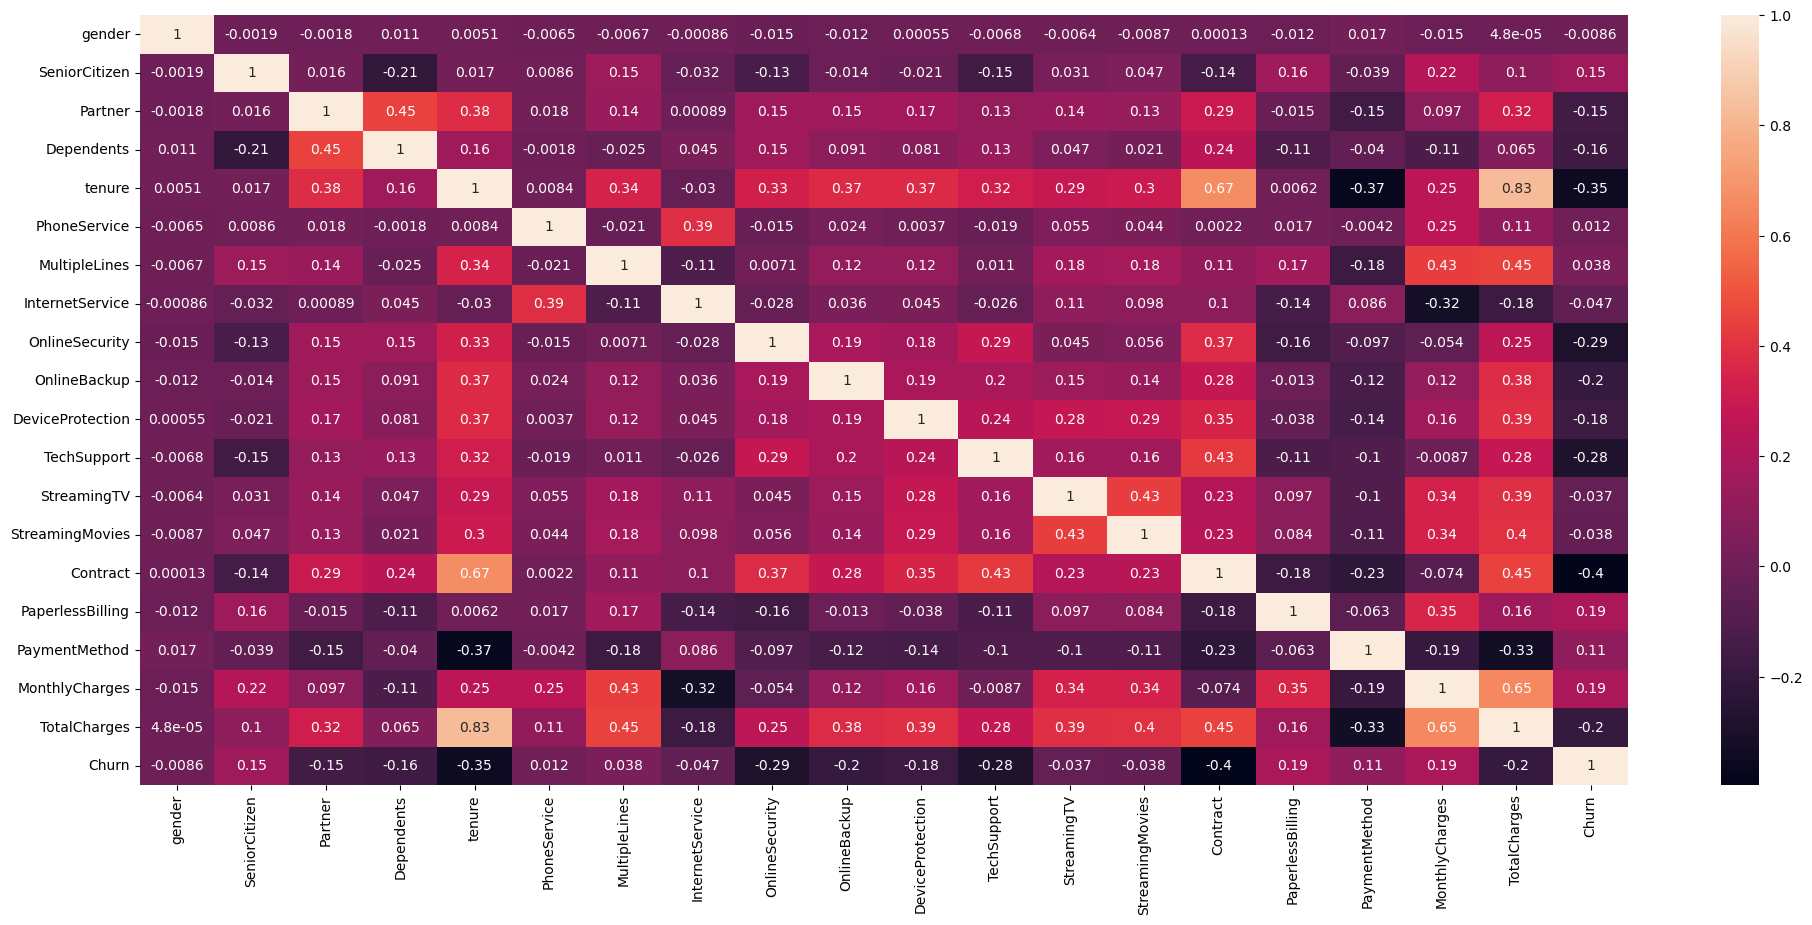

In [148]:
plt.figure(figsize=(24,10))
data_corr = df.corr()
sn.heatmap(data_corr, annot=True)

In [149]:
X = df.iloc[:, :-1] 
y= df['Churn']

## 9. Train-Test Split

Splitting the data into training and testing sets.

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2)

## 10. Feature Scaling

Standardizing numerical features.

In [151]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.fit_transform(X_test[numerical_cols])


## 11. Model Building

Building and evaluating a logistic regression model using a pipeline.

In [155]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression


pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('logreg', LogisticRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


In [153]:

from sklearn.metrics import accuracy_score,classification_report
print("Accuracy of the model:", accuracy_score(y_test, y_pred))


print("Classification report")
print(classification_report(y_test, y_pred))

Accuracy of the model: 0.8069552874378992
Classification report
              precision    recall  f1-score   support

           0       0.86      0.90      0.87      1061
           1       0.63      0.54      0.58       348

    accuracy                           0.81      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

